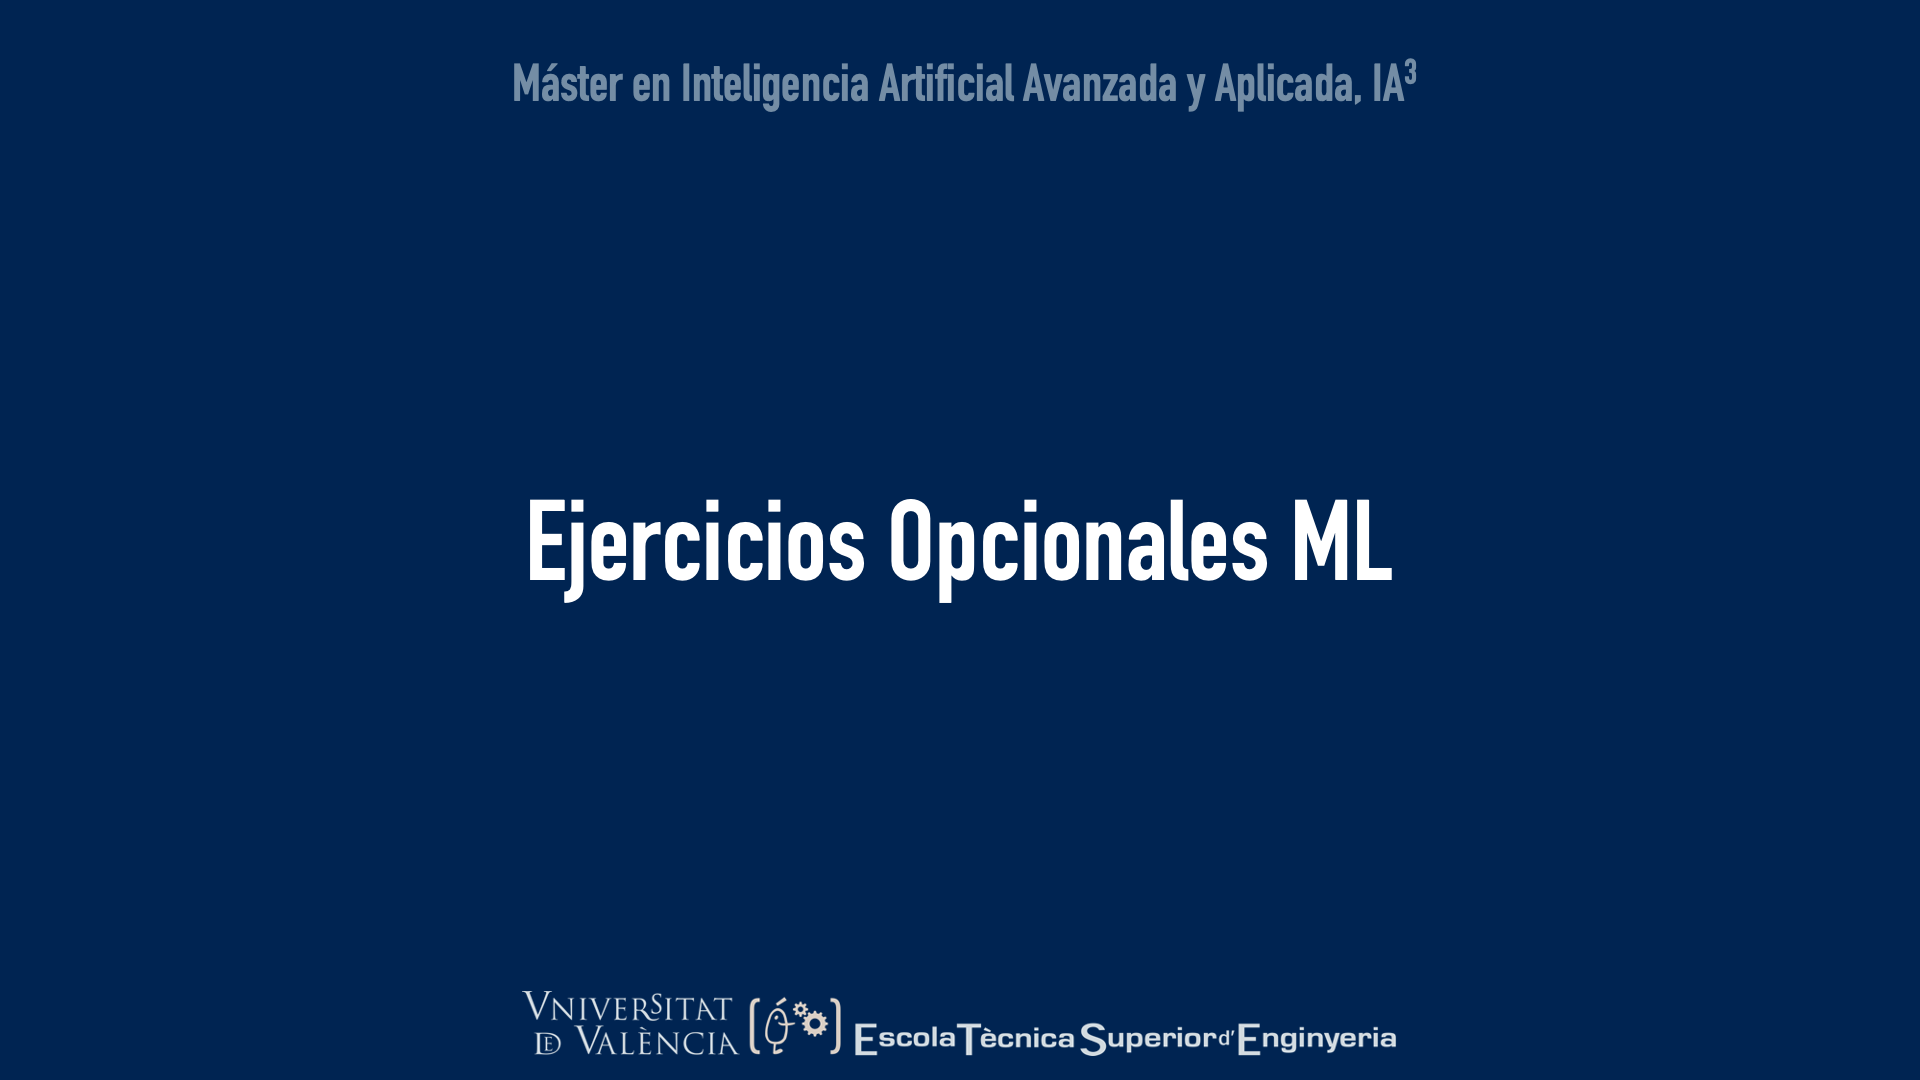

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

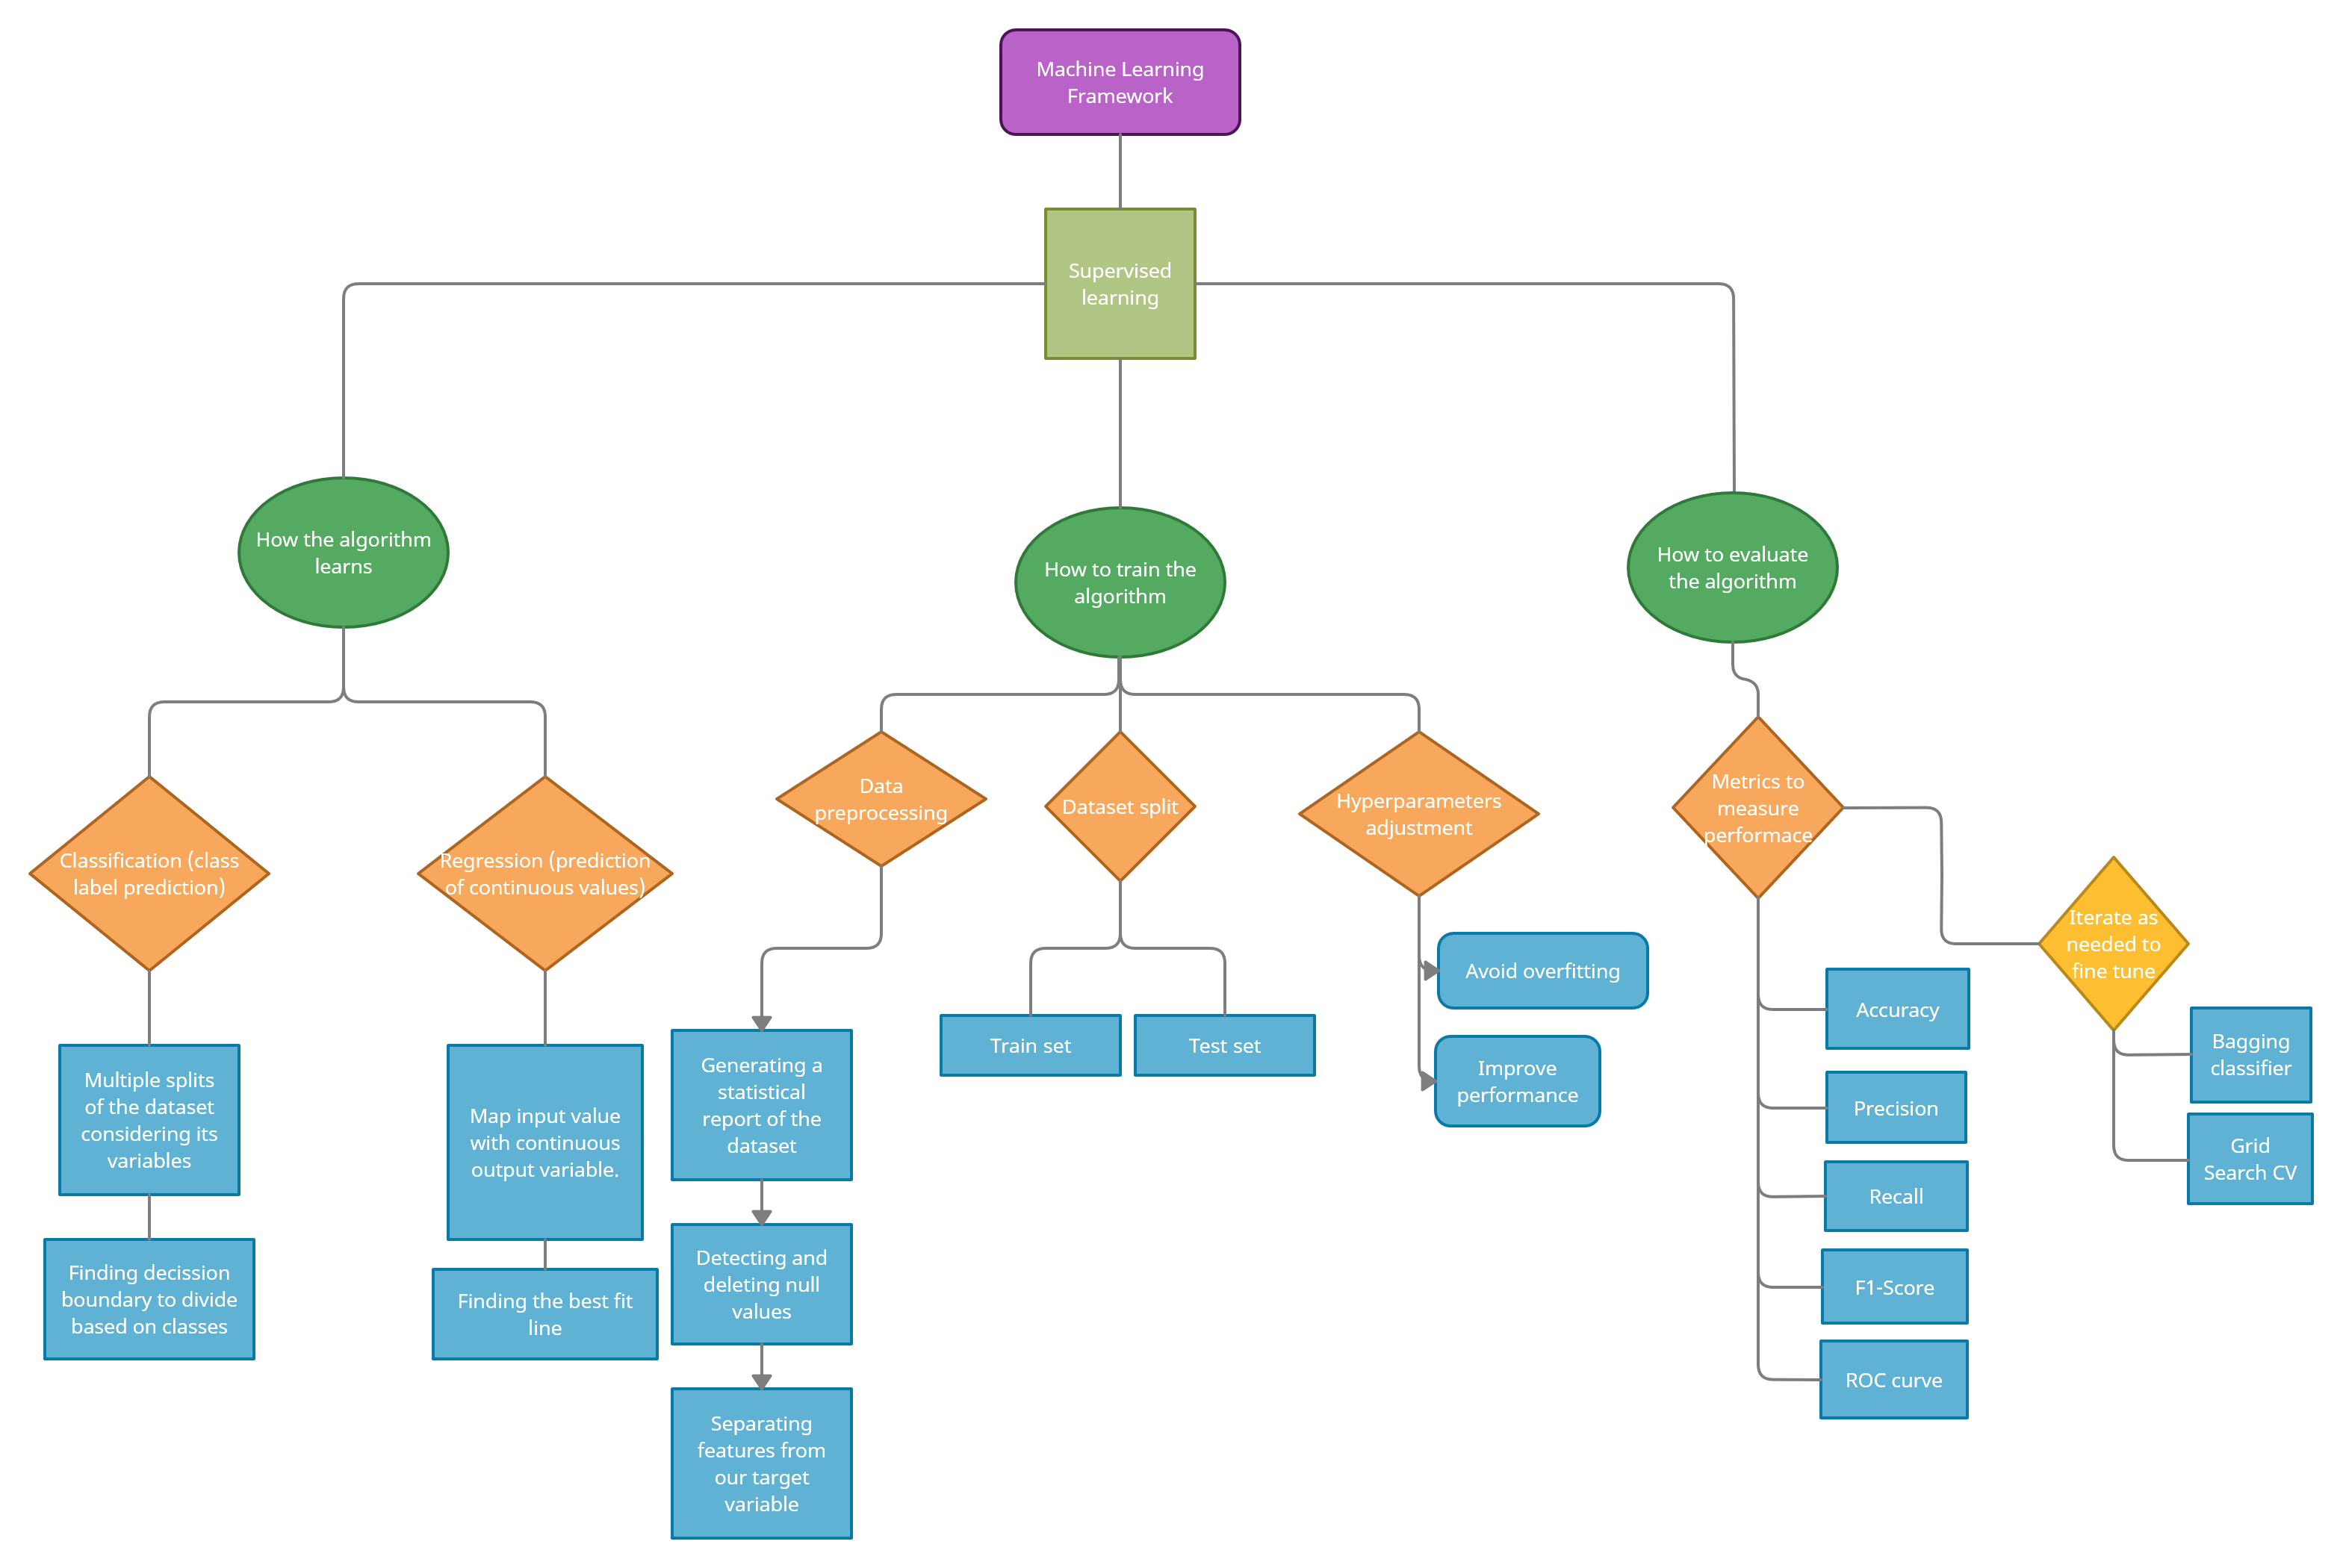

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [29]:
dataset = sns.load_dataset("penguins")
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [30]:
dataset.dropna(inplace=True) #We delete null values
dataset.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [31]:
y = dataset.iloc[:,-1:]
X = dataset.iloc[:,:-1] #We convert "species" and "island" variables into dummy variables
X2 = pd.get_dummies(X)
X2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0


In [60]:
y

,sex
0,Male
1,Female
2,Female
4,Female
5,Male
...,...
338,Female
340,Female
341,Male
342,Female


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X2, y) #We split the dataset

In [34]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train.values.reshape(-1,)) #We fit the model

GaussianNB()

In [35]:
gnb_model.score(X_train, y_train) #We get the accuracy of the model

0.7670682730923695

In [36]:
gnb_model.score(X_test, y_test)

0.7380952380952381

The train set score is 0.7670 and the test set score is 0.7380. These two values are quite similar; we can conclude there is no sign of overfitting.

In [37]:
y_pred = gnb_model.predict(X_test) #We predict class label

In [40]:
print(classification_report(y_test, y_pred)) #We get the performance metrics

              precision    recall  f1-score   support

      Female       0.72      0.76      0.74        41
        Male       0.76      0.72      0.74        43

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84



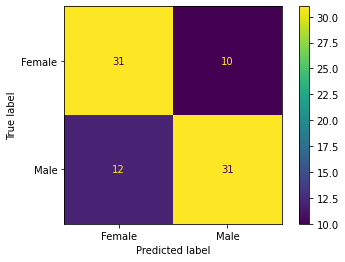

In [41]:
# We display Confusion Matrix to evaluate the accuracy of the classification
cm = confusion_matrix(y_test, y_pred, labels=gnb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb_model.classes_,)
disp.plot()
plt.show()


In [67]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy:',(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error:',(classification_error))

Classification accuracy: 0.7380952380952381
Classification error: 0.2619047619047619


In [48]:
y_pred_prob = gnb_model.predict_proba(X_test)[0:10] #First 10 predicted probabilites of two classes

y_pred_prob

array([[0.01142439, 0.98857561],
       [0.22106859, 0.77893141],
       [0.50341519, 0.49658481],
       [0.0265585 , 0.9734415 ],
       [0.62925375, 0.37074625],
       [0.55872086, 0.44127914],
       [0.19370052, 0.80629948],
       [0.93466535, 0.06533465],
       [0.61932228, 0.38067772],
       [0.84762849, 0.15237151]])

Text(0, 0.5, 'Frequency')

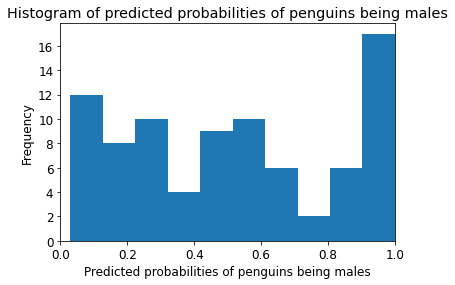

In [70]:
# We plot the histogram of predicted probabilities for class 1

y_pred_class1 = gnb_model.predict_proba(X_test)[:,1]
plt.hist(y_pred_class1, bins = 10)
plt.title('Histogram of predicted probabilities of penguins being males')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of penguins being males')
plt.ylabel('Frequency')